In [1]:
%matplotlib inline

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [3]:
class S(sym.Function):
    """Matching function"""
    
    is_real = True
    
    @classmethod
    def eval(cls, x):
        """We require the S(0)=0 and S(1)=1"""
        if x.is_Number and x is sym.S.Zero:
            return sym.S.Zero
        elif x.is_Number and x is sym.S.One:
            return sym.S.One


\begin{align}
    E \equiv& \frac{1}{2}\Pi_{aa}^2 - \frac{1}{4}\Pi_{Aa}\Pi_{aa}S'(f) - \frac{1}{4}\Pi_{aA}\Pi_{aa}S'(f) > 0\\
    &\iff 2\Pi_{aa}^2 - \Pi_{aa}\big(\Pi_{Aa} + \Pi_{aA}\big)S'(f) > 0 \\
    &\iff 2\Pi_{aa} - \big(\Pi_{Aa} + \Pi_{aA}\big)S'(f) > 0 \\
    &\iff S'(f) < \frac{2\Pi_{aa}}{\Pi_{Aa} + \Pi_{aA}}
\end{align}

# 1X1X model

In [12]:
x = sym.symbols('x')

rhs = f_dot(x, x, S, PiaA, PiAA, Piaa, PiAa)

### Characterizing equilibria

First, note that both $x^*=0$ and $x^*=1$ are equilibria...

In [46]:
rhs.subs({x: 0})

0

In [47]:
rhs.subs({x: 1})

0

...what about the possibility of interior equilibria? Well any equilibria $x^*$ solves...

In [48]:
rhs

-x + (0.5*PiAa*S(x) + 0.5*PiaA*x + x*(PiAA - 0.5*PiAa - 0.5*PiaA)*S(x))/(Piaa + x*(PiaA - Piaa) + x*(PiAA - PiAa - PiaA + Piaa)*S(x) + (PiAa - Piaa)*S(x))

In [50]:
# can divide rhs into numerator and denominator...
numer, denom = sym.fraction(rhs.simplify())

In [51]:
# ...equilibria must solve numerator of rhs
numer.factor()

-1.0*(1.0*PiAA*x**2*S(x) - 1.0*PiAA*x*S(x) - 1.0*PiAa*x**2*S(x) + 1.5*PiAa*x*S(x) - 0.5*PiAa*S(x) - 1.0*PiaA*x**2*S(x) + 1.0*PiaA*x**2 + 0.5*PiaA*x*S(x) - 0.5*PiaA*x + 1.0*Piaa*x**2*S(x) - 1.0*Piaa*x**2 - 1.0*Piaa*x*S(x) + 1.0*Piaa*x)

### Characterizing stability

In [28]:
rhs_jac = rhs.diff(x)

First, decompose jacobian into numerator and denominator...

In [31]:
numer, denom = sym.fraction(rhs_jac.simplify())

...note that denominator is always positive...

In [33]:
denom

(Piaa + x*(PiaA - Piaa) + x*(PiAA - PiAa - PiaA + Piaa)*S(x) + (PiAa - Piaa)*S(x))**2

...and therefore sign of Jacobian is entirely determined by the sign of the numerator...

In [43]:
numer

-(0.5*PiAa*S(x) + 0.5*PiaA*x - x*(-PiAA + 0.5*PiAa + 0.5*PiaA)*S(x))*(PiaA - Piaa + x*(PiAA - PiAa - PiaA + Piaa)*Derivative(S(x), x) + (PiAa - Piaa)*Derivative(S(x), x) + (PiAA - PiAa - PiaA + Piaa)*S(x)) - (Piaa + x*(PiaA - Piaa) + x*(PiAA - PiAa - PiaA + Piaa)*S(x) + (PiAa - Piaa)*S(x))**2 + (Piaa + x*(PiaA - Piaa) + x*(PiAA - PiAa - PiaA + Piaa)*S(x) + (PiAa - Piaa)*S(x))*(0.5*PiAa*Derivative(S(x), x) + 0.5*PiaA - x*(-PiAA + 0.5*PiAa + 0.5*PiaA)*Derivative(S(x), x) - (-PiAA + 0.5*PiAa + 0.5*PiaA)*S(x))

In [41]:
sym.poly(numer.factor(), x).all_coeffs()

PolynomialError: S(x) contains an element of the generators set

In [44]:
rhs_jac.subs({x: 0})

-1 + (0.5*PiAa*Subs(Derivative(S(x), x), (x,), (0,)) + 0.5*PiaA)/Piaa

Stability of the $x^*=0$ equilibrium requires that...

$$ \frac{\partial \dot{x}}{\partial x}\bigg|_{x=0} < 0$$

..taking the derivative yields...

\begin{align}
    \frac{\partial \dot{x}}{\partial x}\bigg|_{x=0} \equiv& -1 + \frac{0.5\Pi_{Aa}S'(0) + 0.5\Pi_{aA}}{\Pi_{aa}} < 0 \\
    &\frac{\Pi_{Aa}S'(0) + \Pi_{aA}}{2\Pi_{aa}} < 1 \\
    &\Pi_{Aa}S'(0) + \Pi_{aA} < 2\Pi_{aa} \\
    &\Pi_{Aa}S'(0) < 2\Pi_{aa} - \Pi_{aA} \\
    &S'(0) < \frac{2\Pi_{aa} - \Pi_{aA}}{\Pi_{Aa}} \\
\end{align}

In [45]:
rhs_jac.subs({x: 1})

-1 + (-PiAA + PiAa - (PiAa - Piaa)*Subs(Derivative(S(x), x), (x,), (1,)) - (PiAA - PiAa - PiaA + Piaa)*Subs(Derivative(S(x), x), (x,), (1,)))/PiAA + (PiAA + 0.5*PiAa*Subs(Derivative(S(x), x), (x,), (1,)) - 0.5*PiAa + (PiAA - 0.5*PiAa - 0.5*PiaA)*Subs(Derivative(S(x), x), (x,), (1,)))/PiAA

Stability of the $x^*=1$ equilibrium requires that...

$$ \frac{\partial \dot{x}}{\partial x}\bigg|_{x=1} < 0$$

...taking the derivative yields...

\begin{align}
    \frac{\partial \dot{x}}{\partial x}\bigg|_{x=1} \equiv& -1 + \frac{-\Pi_{AA} + \Pi_{Aa} - (\Pi_{Aa} - \Pi_{aa})S'(1) - (\Pi_{AA} - \Pi_{Aa} - \Pi_{aA} + \Pi_{aa})S'(1)}{\Pi_{AA}} + \frac{\Pi_{AA} + 0.5\Pi_{Aa}S'(1) - 0.5\Pi_{Aa} + (\Pi_{AA} - 0.5\Pi_{Aa} - 0.5\Pi_{aA})S'(1)}{\Pi_{AA}} < 0 \\
    &\frac{-\Pi_{AA} + \Pi_{Aa} - (\Pi_{AA} - \Pi_{aA})S'(1)}{\Pi_{AA}} + \frac{\Pi_{AA}  - 0.5\Pi_{Aa} + (\Pi_{AA} - 0.5\Pi_{aA})S'(1)}{\Pi_{AA}} < 1 \\
    &\frac{\Pi_{Aa} + \Pi_{aA}S'(1)}{2\Pi_{AA}} < 1 \\
    &S'(1) < \frac{2\Pi_{AA} - \Pi_{Aa}}{\Pi_{aA}}
\end{align}

# 1X2X model

In [4]:
def total_surviving_altruists(x, S, PiaA, PiAA, Piaa, PiAa):
    num_survivors = (2 * PiAA * x * S(x)**2 +
                     Piaa * x * (1 - S(x))**2 + 
                     (2 * PiAa + PiaA) * x * S(x) * (1 - S(x)) +
                     PiAA * (1 - x) * S(x)**2 + 
                     PiAa * (1 - x) * S(x) * (1 - S(x)))
    return num_survivors


def total_altruists(x, S, PiaA, PiAA, Piaa, PiAa):
    num_total = (2 * (PiAA * S(x)**2 + Piaa * (1 - S(x))**2 +
                     (PiAa + PiaA) * S(x) * (1 - S(x))))
    return num_total


In [5]:
def share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa):
    x_dot = ((total_surviving_altruists(x, S, PiaA, PiAA, Piaa, PiAa) /
              total_altruists(x, S, PiaA, PiAA, Piaa, PiAa)) - x)
    return x_dot

In [6]:
t, x = sym.symbols('t, x')
PiaA, PiAA, Piaa, PiAa = sym.symbols('PiaA, PiAA, Piaa, PiAa')

share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa)

-x + (2*PiAA*x*S(x)**2 + PiAA*(-x + 1)*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*S(x) + Piaa*x*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*S(x)**2 + 2*Piaa*(-S(x) + 1)**2 + 2*(PiAa + PiaA)*(-S(x) + 1)*S(x))

In [45]:
# unless I screwed up, x=0, 1 should both be fixed points!
assert share_altruists(0, 0, S, PiaA, PiAA, Piaa, PiAa) == 0
assert share_altruists(0, 1, S, PiaA, PiAA, Piaa, PiAa) == 0

In [23]:
x_star, S_star = sym.symbols('x_star, S_star')
x_tilde, = sym.solve(share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa).subs({S(x): S_star}), x)

In [24]:
x_tilde

S_star*(PiAA*S_star - PiAa*S_star + PiAa)/(PiAA*S_star**2 - PiAa*S_star**2 + PiAa*S_star - PiaA*S_star**2 + PiaA*S_star + Piaa*(S_star - 1)**2)

In [27]:
S_tilde, _ = sym.solve(x_star - x_tilde, S_star)

In [28]:
S_tilde.simplify()

(-PiAa*x_star/2 + PiAa/2 - PiaA*x_star/2 + Piaa*x_star - sqrt(-4*PiAA*Piaa*x_star**2 + 4*PiAA*Piaa*x_star + PiAa**2*x_star**2 - 2*PiAa**2*x_star + PiAa**2 + 2*PiAa*PiaA*x_star**2 - 2*PiAa*PiaA*x_star + PiaA**2*x_star**2)/2)/(PiAA*x_star - PiAA - PiAa*x_star + PiAa - PiaA*x_star + Piaa*x_star)

In [30]:
S_tilde.subs({PiaA: 4, PiAA: 3, Piaa: 2, PiAa: 1, x_star: 0.4})

0.500000000000000

## Stability

In [31]:
rhs_jac = share_altruists(t, x, S, PiaA, PiAA, Piaa, PiAa).diff(x, 1)

In [32]:
rhs_jac

-1 + (4*PiAA*x*S(x)*Derivative(S(x), x) + 2*PiAA*(-x + 1)*S(x)*Derivative(S(x), x) + PiAA*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*Derivative(S(x), x) - PiAa*(-x + 1)*S(x)*Derivative(S(x), x) - PiAa*(-S(x) + 1)*S(x) - 2*Piaa*x*(-S(x) + 1)*Derivative(S(x), x) + Piaa*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*Derivative(S(x), x) - x*(2*PiAa + PiaA)*S(x)*Derivative(S(x), x) + (2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*S(x)**2 + 2*Piaa*(-S(x) + 1)**2 + 2*(PiAa + PiaA)*(-S(x) + 1)*S(x)) + (-4*PiAA*S(x)*Derivative(S(x), x) + 4*Piaa*(-S(x) + 1)*Derivative(S(x), x) - 2*(PiAa + PiaA)*(-S(x) + 1)*Derivative(S(x), x) + 2*(PiAa + PiaA)*S(x)*Derivative(S(x), x))*(2*PiAA*x*S(x)**2 + PiAA*(-x + 1)*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*S(x) + Piaa*x*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*S(x)**2 + 2*Piaa*(-S(x) + 1)**2 + 2*(PiAa + PiaA)*(-S(x) + 1)*S(x))**2

In [58]:
rhs_jac + 1

(4*PiAA*x*S(x)*Derivative(S(x), x) + 2*PiAA*(-x + 1)*S(x)*Derivative(S(x), x) + PiAA*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*Derivative(S(x), x) - PiAa*(-x + 1)*S(x)*Derivative(S(x), x) - PiAa*(-S(x) + 1)*S(x) - 2*Piaa*x*(-S(x) + 1)*Derivative(S(x), x) + Piaa*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*Derivative(S(x), x) - x*(2*PiAa + PiaA)*S(x)*Derivative(S(x), x) + (2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*S(x)**2 + 2*Piaa*(-S(x) + 1)**2 + 2*(PiAa + PiaA)*(-S(x) + 1)*S(x)) + (-4*PiAA*S(x)*Derivative(S(x), x) + 4*Piaa*(-S(x) + 1)*Derivative(S(x), x) - 2*(PiAa + PiaA)*(-S(x) + 1)*Derivative(S(x), x) + 2*(PiAa + PiaA)*S(x)*Derivative(S(x), x))*(2*PiAA*x*S(x)**2 + PiAA*(-x + 1)*S(x)**2 + PiAa*(-x + 1)*(-S(x) + 1)*S(x) + Piaa*x*(-S(x) + 1)**2 + x*(2*PiAa + PiaA)*(-S(x) + 1)*S(x))/(2*PiAA*S(x)**2 + 2*Piaa*(-S(x) + 1)**2 + 2*(PiAa + PiaA)*(-S(x) + 1)*S(x))**2

In [55]:
numer.simplify()

((PiAA*S(x)**2 + Piaa*(S(x) - 1)**2 - (PiAa + PiaA)*(S(x) - 1)*S(x))*(4*PiAA*x*S(x)*Derivative(S(x), x) - 2*PiAA*(x - 1)*S(x)*Derivative(S(x), x) + PiAA*S(x)**2 + PiAa*(x - 1)*(S(x) - 1)*Derivative(S(x), x) + PiAa*(x - 1)*S(x)*Derivative(S(x), x) + PiAa*(S(x) - 1)*S(x) + 2*Piaa*x*(S(x) - 1)*Derivative(S(x), x) + Piaa*(S(x) - 1)**2 - x*(2*PiAa + PiaA)*(S(x) - 1)*Derivative(S(x), x) - x*(2*PiAa + PiaA)*S(x)*Derivative(S(x), x) - (2*PiAa + PiaA)*(S(x) - 1)*S(x)) - (2*PiAA*S(x) + 2*Piaa*(S(x) - 1) - (PiAa + PiaA)*(S(x) - 1) - (PiAa + PiaA)*S(x))*(2*PiAA*x*S(x)**2 - PiAA*(x - 1)*S(x)**2 + PiAa*(x - 1)*(S(x) - 1)*S(x) + Piaa*x*(S(x) - 1)**2 - x*(2*PiAa + PiaA)*(S(x) - 1)*S(x))*Derivative(S(x), x))/(2*(PiAA*S(x)**2 + Piaa*(S(x) - 1)**2 - (PiAa + PiaA)*(S(x) - 1)*S(x))**2)

### $x=1$...

In [33]:
rhs_jac.subs({x: 1})

-1 + (-4*PiAA*Subs(Derivative(S(x), x), (x,), (1,)) + 2*(PiAa + PiaA)*Subs(Derivative(S(x), x), (x,), (1,)))/(2*PiAA) + (4*PiAA*Subs(Derivative(S(x), x), (x,), (1,)) + PiAA - (2*PiAa + PiaA)*Subs(Derivative(S(x), x), (x,), (1,)))/(2*PiAA)

In [34]:
rhs_jac.subs({x: 1}).simplify()

-(PiAA - PiaA*Subs(Derivative(S(x), x), (x,), (1,)))/(2*PiAA)

Stability requires...

$$ S'(1) < \frac{\Pi_{AA}}{\Pi_{aA}} $$

### $x=0$...

In [44]:
rhs_jac.subs({x: 0})

-1 + (PiAa*Subs(Derivative(S(x), x), (x,), (0,)) + Piaa)/(2*Piaa)

In [66]:
rhs_jac.subs({x: 1}).simplify()

-(PiAA - PiaA*Subs(Derivative(S(x), x), (x,), (1,)))/(2*PiAA)

Stability requires...

$$ S'(0) < \frac{\Pi_{aa}}{\Pi_{Aa}} $$

In [51]:
sym.diff(S_tilde, x_star)

(-PiAA + PiAa + PiaA - Piaa)*(-PiAa*x_star/2 + PiAa/2 - PiaA*x_star/2 + Piaa*x_star - sqrt(-4*PiAA*Piaa*x_star**2 + 4*PiAA*Piaa*x_star + PiAa**2*x_star**2 - 2*PiAa**2*x_star + PiAa**2 + 2*PiAa*PiaA*x_star**2 - 2*PiAa*PiaA*x_star + PiaA**2*x_star**2)/2)/(PiAA*x_star - PiAA - PiAa*x_star + PiAa - PiaA*x_star + Piaa*x_star)**2 + (-PiAa/2 - PiaA/2 + Piaa - (-4*PiAA*Piaa*x_star + 2*PiAA*Piaa + PiAa**2*x_star - PiAa**2 + 2*PiAa*PiaA*x_star - PiAa*PiaA + PiaA**2*x_star)/(2*sqrt(-4*PiAA*Piaa*x_star**2 + 4*PiAA*Piaa*x_star + PiAa**2*x_star**2 - 2*PiAa**2*x_star + PiAa**2 + 2*PiAa*PiaA*x_star**2 - 2*PiAa*PiaA*x_star + PiaA**2*x_star**2)))/(PiAA*x_star - PiAA - PiAa*x_star + PiAa - PiaA*x_star + Piaa*x_star)

### Example: Exponential matching

In [70]:
def exponential_matching(x, e=0.8):
    return x**(1 - e)

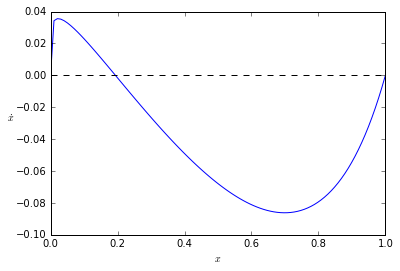

In [71]:
ts = np.linspace(0, 100, 100)
xs = np.linspace(0, 1, 100)
params = {'PiaA': 50, 'PiAA': 4, 'Piaa': 3, 'PiAa': 2}

plt.plot(xs, share_altruists(ts, xs, exponential_matching, **params))
plt.axhline(y=0, linestyle='dashed', color='k')
plt.ylabel(r'$\dot{x}$', rotation='horizontal')
plt.xlabel(r'$x$')
plt.show()

In [66]:
def S_tilde(x_star, PiaA, PiAA, Piaa, PiAa):
    return (-PiAa*x_star/2 + PiAa/2 - PiaA*x_star/2 + Piaa*x_star - np.sqrt(-4*PiAA*Piaa*x_star**2 + 4*PiAA*Piaa*x_star + PiAa**2*x_star**2 - 2*PiAa**2*x_star + PiAa**2 + 2*PiAa*PiaA*x_star**2 - 2*PiAa*PiaA*x_star + PiaA**2*x_star**2)/2)/(PiAA*x_star - PiAA - PiAa*x_star + PiAa - PiaA*x_star + Piaa*x_star)

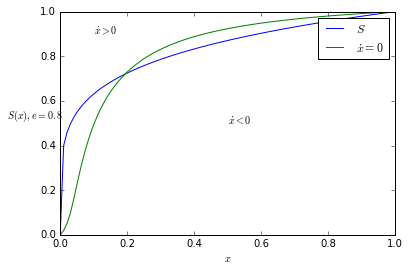

In [76]:
ts = np.linspace(0, 100, 100)
xs = np.linspace(0, 1, 100)
params = {'PiaA': 50, 'PiAA': 4, 'Piaa': 3, 'PiAa': 2}

plt.plot(xs, exponential_matching(xs), label='$S$')
plt.plot(xs, S_tilde(xs, **params), label='$\dot{x}=0$')

plt.axhline(y=0, linestyle='dashed', color='k')
plt.ylabel(r'$S(x), e=0.8$', rotation='horizontal')
plt.xlabel(r'$x$')
plt.text(0.5, 0.5, s=r'$\dot{x}<0$')
plt.text(0.1, 0.9, s=r'$\dot{x}>0$')

plt.legend()
plt.show()